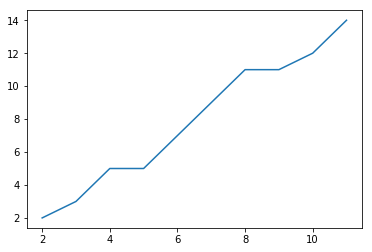

In [8]:
import random
class Vertex:
    def __init__(self, name, list):
        self.name = name
        self.neighbors = list

def graphGenerator(n):
    vertices = []
    for k in range(n):
        vertices.append(Vertex(k, []))
    for i in range(n):
        for j in range(i+1, n):
            if i != j:
                ret = random.random()
                if ret < 0.5:
                    vertices[i].neighbors.append(j)
                    vertices[j].neighbors.append(i)
    return vertices

def independentSet(vertices):
    independentSet = []
    while(len(vertices) > 0):
        vertices.sort(key=lambda x: len(x.neighbors), reverse=False)
        independentSet.append(vertices[0].name)
        toDelete_list = vertices[0].neighbors
        toDelete_list.append(vertices[0].name)
        for name in toDelete_list:
            vertices = [vertex for vertex in vertices if vertex.name != name]
        for vertex in vertices:
            for node in toDelete_list:
                vertex.neighbors = [neighbor for neighbor in vertex.neighbors if neighbor != node]
    return independentSet

import matplotlib.pyplot as plt
import math

graphSize_list = []
setSize_list = []
for i in range(2, 12):
    size = int(math.pow(2, i))
    graphSize_list.append(i)
    vertices = graphGenerator(size)
    setSize_list.append(len(independentSet(vertices)))
plt.plot(graphSize_list, setSize_list)
plt.show()
